# 과적합 방지_Early Stopping

**`왜 과적합이 문제가 될까?`**

- 모델이 복잡해지면, 가짜 패턴(연관성)까지 학습하게 됨.
- 가짜 패턴
    - 학습 데이터에만 존재하는 특이한 성질
    - 모집단 전체의 특성 X
    - 학습데이터 외의 데이터셋에는 성능이 떨어짐   
    $ $
    
- 모델링의 목적
    - 학습용 데이터에 있는 패턴으로, 그 외 데이터(모집단 전체)를 적절히 예측
    - 그러므로 학습한 패턴(모델)은 학습용 데이터 뿐 아니라 다른 데이터도 잘 예측해야 함.
    - 적절한 복잡도 => 적절한 예측력

$ $

$ $

**`적절한 모델은 어떻게 만들까?`**
- 무엇을 조절해서 '적절한 모델'을 만들어낼 수 있을까?
    - 모델의 <span style="color:palevioletred">**복잡도**</span>: 학습용 데이터의 패턴을 반영하는 정도    
$ $    
- 딥러닝에서는 다음을 조절합니다
    - epoch, learning_rate
    - 모델 구조 조정: hidden layer, node수
    - regularization(규제): L1, L2
    - dropout
    

$ $

$ $

**`과적합 발생 전에 멈추기 Early Stopping`**
- 반복횟수(epoch)가 많으면 과적합 될 수 있음
- 오차가 더 이상 줄지 않으면 멈춰라 ==> <span style="color:palevioletred">**Early Stopping**</span>


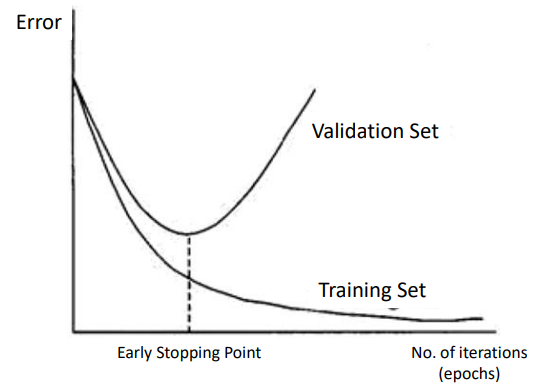

- 코드
    - <span style="color:slateblue">**from keras.callbacks import EarlyStopping**</span>
    - <span style="color:slateblue">**es = EarlyStopping(moniter='val_loss', mid_delta=0, patience=0)**</span>
    - <span style="color:slateblue">**model.fit(x_train, y_train, epochs=100, validation_split=0.2, callbacks=[es])**</span>
    
$ $

- EarlyStopping 옵션
    - monitor: 기본값이 val_loss
    - mid_delta: 오차(loss)의 최소값에서 변화량(줄어드는 양)이 몇 이상 되어야 하는지 지정. 기본값은 0
    - patience: 오차가 줄어들지 않는 상황을 몇 번(epoch) 기다려줄 건지 지정. 기본값은 0
    
$ $    
- .fit에 옵션으로 지정하여 사용
    - callbacks: epoch단위로 학습이 진행되는 동안, 중간에 개입할 task를 지정

$ $

$ $

`모델 저장하기`

- 모델 저장하기
    - <span style="color:slateblue">**model.save('파일이름.h5')**</span>
    - 딥러닝 모델의 메소드로 .save가 제공됩니다.
    - 파일이름 .h5파일이 저장됩니다.(h5: 하둡파일 형식)

$ $
- 모델 로딩하기
    - load_model 함수는 별도로 불러와야 함
    - 경로를 맞춰주고 h5파일을 읽어오면 그대로 사용 가능.
    - 코드
        - <span style="color:slateblue">**from keras.models import load_model**</span>
        - <span style="color:slateblue">**model = load_model('파일이름.h5')**</span>
        
        $ $
- cf) 모델은 파일로 관리해야 한다 ex) mlflow
    - 피클링: 객체를 바이너리 형식으로 직렬화(serialize)하는 과정

$ $

$ $

# 종합실습_MNIST

### 1. 환경준비

In [1]:
# 라이브러리 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.datasets import mnist

from keras.callbacks import EarlyStopping

In [2]:
# 함수 만들기
# 학습곡선 함수

def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()


In [3]:
# 케라스 데이터셋으로 부터 mnist 불러오기
(x_train, y_train), (x_val, y_val) = mnist.load_data()

In [4]:
# 데이터 확인하기
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
# 10개로 분류 나누기
class_names = ['0','1','2','3','4','5','6','7','8','9']

### 2. 데이터 살펴보기

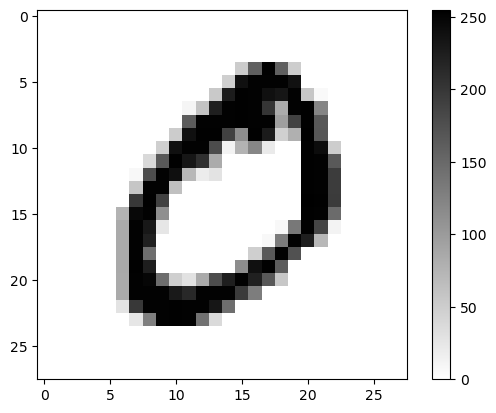

In [6]:
# 아래 숫자를 바꿔가며 화면에 그려 봅시다.
n = 1

plt.figure()
plt.imshow(x_train[n], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

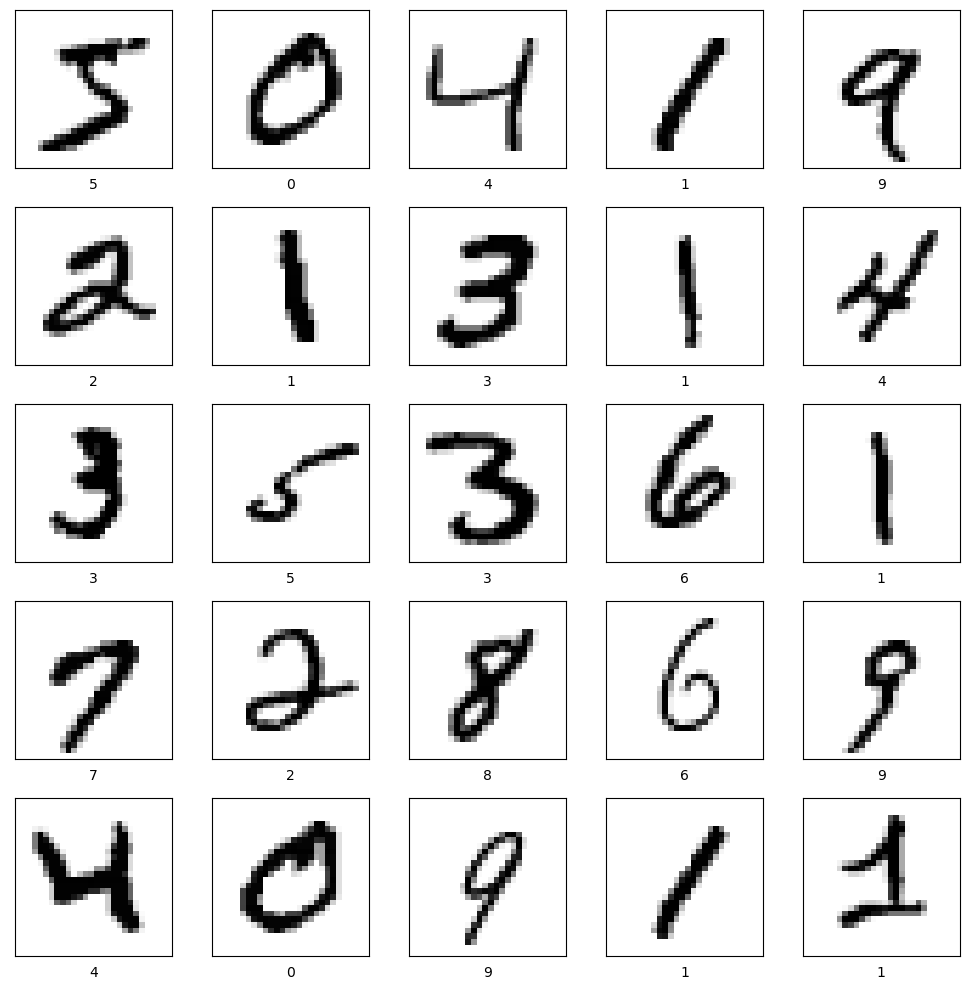

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.show()

### 3. 데이터 준비

In [8]:
# 데이터 차원 확인하기
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [9]:
# 데이터 2차원으로 펼치기
x_train = x_train.reshape(60000, -1)
x_val = x_val.reshape(10000,-1)

In [10]:
x_train = x_train[:3000]
y_train = y_train[:3000]

x_val = x_val[:1000]
y_val = y_val[:1000]

In [11]:
# 바뀐 차원 확인하기
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((3000, 784), (3000,), (1000, 784), (1000,))

In [12]:
# scaling: Min-Max
# 0-255 값으로 되어있는 데이터를 0-1사이로 변환
# x_train, x_val을 그냥 255로 나누면 됨

x_train = x_train / 255
x_val = x_val /255

### 4.모델링: 과적합

In [13]:
n = x_train.shape[1]
n

784

In [14]:
# clear
clear_session()

# model 구성하기 Sequential
model = Sequential([Dense(10, input_shape=(n,), activation='softmax')])

# 모델 요약하기
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x0000013873DFF430>>

In [15]:
# 과적합 방지하기 
# earlystopping 설정
es = EarlyStopping(monitor='val_loss'
                   , min_delta=0    # 오차의 최솟값에서 변화량이 몇 이상 되어야 하는지
                   , patience=0)    # 오차가 줄어들지 않는 상황을 몇번이나 참을거야?


In [18]:
# 모델 학습하기
model.compile(optimizer=Adam(learning_rate=0.001), loss = 'sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs=100, validation_split=0.2
                   , callbacks = [es]).history

Epoch 1/100
75/75 [==============================] - 1s 7ms/step - loss: 0.6064 - val_loss: 0.5444
Epoch 2/100
75/75 [==============================] - 0s 3ms/step - loss: 0.4860 - val_loss: 0.4846


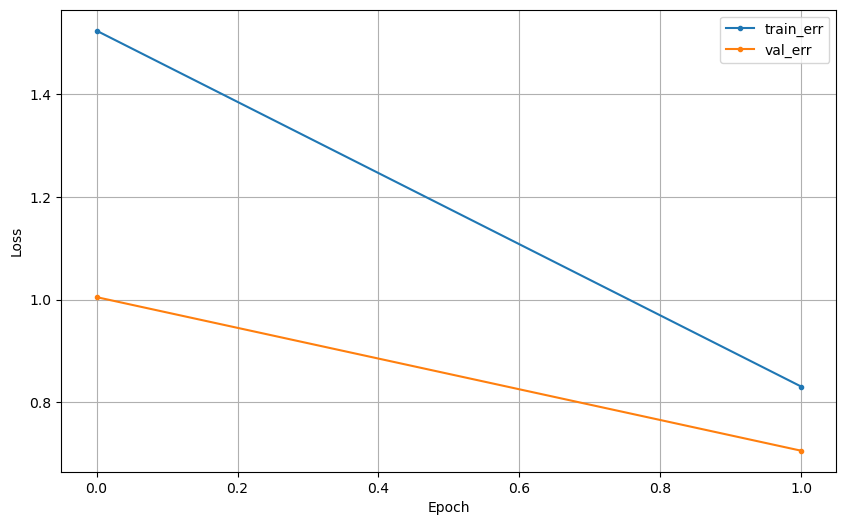

In [17]:
# 학습결과 그래프
dl_history_plot(history)

### 5. min_delta, patience 조절

In [19]:
# 두 값을 변경시켜보기

md = 0.01
pa = 5

es = EarlyStopping(monitor = 'val_loss', min_delta = md, patience = pa)

model = Sequential([Dense(10, input_shape=(n,), activation='softmax')])

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs=100, validation_split=0.2, callbacks=[es]).history

Epoch 1/100
75/75 [==============================] - 1s 7ms/step - loss: 1.5632 - val_loss: 1.0312
Epoch 2/100
75/75 [==============================] - 0s 4ms/step - loss: 0.8500 - val_loss: 0.7148
Epoch 3/100
75/75 [==============================] - 0s 5ms/step - loss: 0.6383 - val_loss: 0.5861
Epoch 4/100
75/75 [==============================] - 0s 4ms/step - loss: 0.5346 - val_loss: 0.5165
Epoch 5/100
75/75 [==============================] - 0s 5ms/step - loss: 0.4717 - val_loss: 0.4741
Epoch 6/100
75/75 [==============================] - 0s 5ms/step - loss: 0.4268 - val_loss: 0.4467
Epoch 7/100
75/75 [==============================] - 0s 5ms/step - loss: 0.3938 - val_loss: 0.4245
Epoch 8/100
75/75 [==============================] - 0s 4ms/step - loss: 0.3669 - val_loss: 0.4068
Epoch 9/100
75/75 [==============================] - 0s 4ms/step - loss: 0.3454 - val_loss: 0.3975
Epoch 10/100
75/75 [==============================] - 0s 4ms/step - loss: 0.3284 - val_loss: 0.3787
Epoch 11/

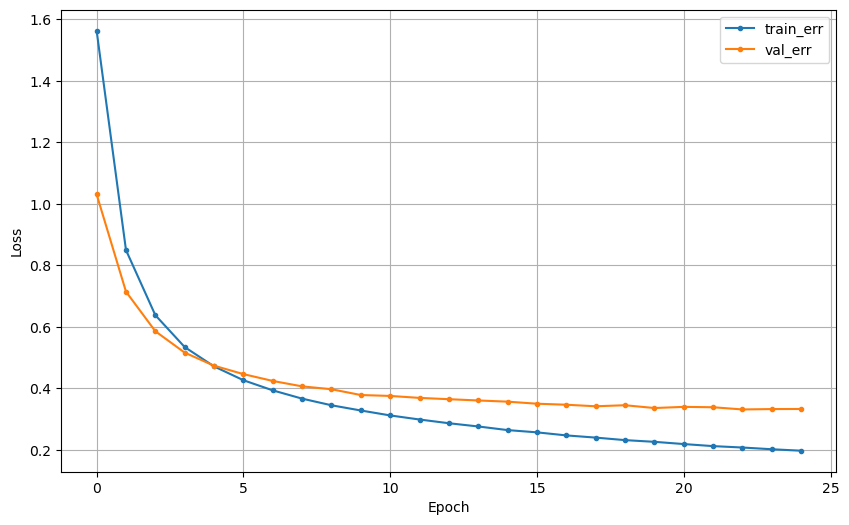

In [20]:
dl_history_plot(history)

In [21]:
# 예측하기

pred = model.predict(x_val)
pred = pred.argmax(axis=1)

32/32 [==============================] - 0s 2ms/step


In [22]:
print(confusion_matrix(y_val, pred))
print("="*70)
print(classification_report(y_val, pred))

[[ 83   0   1   0   0   0   1   0   0   0]
 [  0 121   0   1   0   2   1   0   1   0]
 [  0   1 100   2   0   0   0   3   7   3]
 [  0   0   2  87   0  11   2   1   3   1]
 [  1   0   0   0  96   0   2   0   1  10]
 [  1   0   1   2   1  74   1   3   2   2]
 [  2   0   1   0   1   3  79   1   0   0]
 [  0   2   4   0   2   1   0  84   0   6]
 [  2   0   2   6   3   2   1   3  67   3]
 [  0   0   0   1   4   0   0   3   2  84]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        85
           1       0.98      0.96      0.97       126
           2       0.90      0.86      0.88       116
           3       0.88      0.81      0.84       107
           4       0.90      0.87      0.88       110
           5       0.80      0.85      0.82        87
           6       0.91      0.91      0.91        87
           7       0.86      0.85      0.85        99
           8       0.81      0.75      0.78        89
           9       0.77     

In [ ]:
# - 1의 정확도가 가장 높고 9의 정확도가 가장 낮다.
#         (1로 예측한 것 중에 실제로 1인 경우가 많음)
    
# - 0의 재현율이 높고 8의 재현율이 가장 낮았다
#         (실제로 0중에 0이라고 예측하는 비율이 가장 높음)

### 6. 모델 저장하기

**모델 저장하기**   
- model.save('파일이름.h5')
- 저장된 파일은 왼쪽 '파일'탬에서 확인 가능
- 파일을 다운받을 수 있음

In [23]:
model.save('mnist_model.h5')

**모델 로딩하기**
- from keras.models import load_model 라이브러리 불러오기
- model = load_model('파일이름.h5')

In [24]:
from keras.models import load_model
model1 = load_model('mnist_model.h5')

In [25]:
pred1 = model1.predict(x_val)

32/32 [==============================] - 0s 2ms/step


In [26]:
pred1 = pred1.argmax(axis=1)

In [27]:
print(accuracy_score(y_val,pred1))
print('-'*60)
print(confusion_matrix(y_val, pred1))
print('-'*60)
print(classification_report(y_val, pred1))

0.875
------------------------------------------------------------
[[ 83   0   1   0   0   0   1   0   0   0]
 [  0 121   0   1   0   2   1   0   1   0]
 [  0   1 100   2   0   0   0   3   7   3]
 [  0   0   2  87   0  11   2   1   3   1]
 [  1   0   0   0  96   0   2   0   1  10]
 [  1   0   1   2   1  74   1   3   2   2]
 [  2   0   1   0   1   3  79   1   0   0]
 [  0   2   4   0   2   1   0  84   0   6]
 [  2   0   2   6   3   2   1   3  67   3]
 [  0   0   0   1   4   0   0   3   2  84]]
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        85
           1       0.98      0.96      0.97       126
           2       0.90      0.86      0.88       116
           3       0.88      0.81      0.84       107
           4       0.90      0.87      0.88       110
           5       0.80      0.85      0.82        87
           6       0.91      0.91      0.91        87
        